In [15]:
from glob import glob
import os as os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

Load images from folder


In [16]:
CLASS_NAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


In [17]:
from cv2 import cvtColor


CLASS_NAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

def load_images_from_folder(folder):
    images = []
    labels = []
    for label, className in enumerate(CLASS_NAMES):
        class_folder= os.path.join(folder, className)
        for filename in os.listdir(class_folder):
            img = cv2.imread(os.path.join(class_folder, filename))
            if img is not None:
                img = cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (128, 128))
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)

In [18]:
X_train, y_train = load_images_from_folder('intel-image-classification/seg_train/seg_train/')
X_test, y_test = load_images_from_folder('intel-image-classification/seg_test/seg_test/')

In [19]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14034, 128, 128, 3) (14034,)
(3000, 128, 128, 3) (3000,)


Henter Short data

In [20]:
data_mengde = 10

# bruk kun 1 av 10 bilder
train_sel = np.arange(0, len(X_train), data_mengde)
test_sel = np.arange(0, len(X_test), data_mengde)
X_train_short = X_train[train_sel]
y_train_short = y_train[train_sel]
X_test_short = X_test[test_sel]
y_test_short = y_test[test_sel]

print("Brukte "+ str(round(100/data_mengde, 2)) +"% av dataen")
print(X_train_short.shape, y_train_short.shape)
print(X_test_short.shape, y_test_short.shape)

Brukte 10.0% av dataen
(1404, 128, 128, 3) (1404,)
(300, 128, 128, 3) (300,)


In [21]:
print(X_train_short.shape, y_train_short.shape)
print(X_test_short.shape, y_test_short.shape)

(1404, 128, 128, 3) (1404,)
(300, 128, 128, 3) (300,)


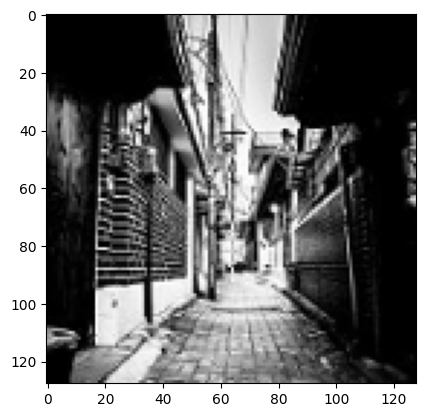

In [22]:
my_img = X_train[13000]
plt.imshow(my_img)


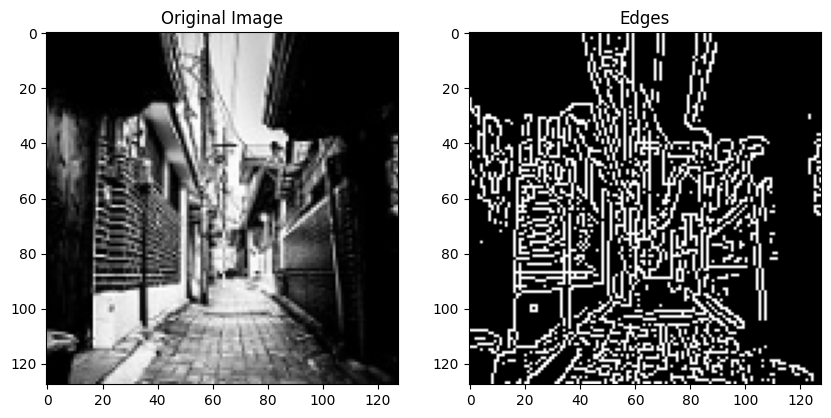

In [23]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.cvtColor(my_img, cv2.COLOR_RGB2GRAY)

# Apply Canny edge detector
edges = cv2.Canny(image, 128, 128)

# Display the original image and the edges
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Edges')
plt.imshow(edges, cmap='gray')
plt.show()

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern


def show_lbp_and_hog(
    img,
    lbp_P=10,
    lbp_R=3,
    orientations=16,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
):
    """
    Visualise LBP (P=10, R=3 by default) and HOG for a single RGB image.

    img: RGB image as a NumPy array (H x W x 3)
    """

    # ----- Pre-processing -----
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # ----- LBP -----
    lbp = local_binary_pattern(gray, P=lbp_P, R=lbp_R, method="uniform")

    n_bins = 256
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=n_bins, range=(0, 256))

    # ----- HOG (with visualisation image) -----
    fd, hog_image = hog(
        gray,
        orientations=orientations,
        pixels_per_cell=pixels_per_cell,
        cells_per_block=cells_per_block,
        visualize=True,
        channel_axis=None,
    )

    # ================== FIGURE 1: LBP ==================
    fig1, axes1 = plt.subplots(1, 2, figsize=(10, 4))
    ax0, ax1 = axes1

    ax0.imshow(img)
    ax0.set_title("Original Image")
    ax0.axis("off")

    ax1.imshow(lbp, cmap="gray")
    ax1.set_title(f"LBP {lbp_P}-Neighbor, R={lbp_R}")
    ax1.axis("off")

    lbp_text = f"P = {lbp_P}\nR = {lbp_R}\nmethod = 'uniform'"
    ax1.text(
        0.02,
        0.98,
        lbp_text,
        transform=ax1.transAxes,
        va="top",
        ha="left",
        fontsize=8,
        bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
    )

    # reduce margins and space between subplots
    fig1.subplots_adjust(left=0.02, right=0.98, top=0.95, bottom=0.05, wspace=0.02)

    # ================== FIGURE 2: HOG ==================
    fig2, axes2 = plt.subplots(1, 2, figsize=(10, 4))
    ax0, ax1 = axes2

    ax0.imshow(img)
    ax0.set_title("Original Image")
    ax0.axis("off")

    ax1.imshow(hog_image, cmap="gray")
    ax1.set_title("HOG Features")
    ax1.axis("off")

    hog_text = (
        f"orientations = {orientations}\n"
        f"pixels_per_cell = {pixels_per_cell[0]}×{pixels_per_cell[1]}\n"
        f"cells_per_block = {cells_per_block[0]}×{cells_per_block[1]}"
    )
    ax1.text(
        0.02,
        0.98,
        hog_text,
        transform=ax1.transAxes,
        va="top",
        ha="left",
        fontsize=8,
        bbox=dict(facecolor="black", alpha=0.7, edgecolor="none", pad=4),
        color="white",
    )

    fig2.subplots_adjust(left=0.02, right=0.98, top=0.95, bottom=0.05, wspace=0.02)

    plt.show()


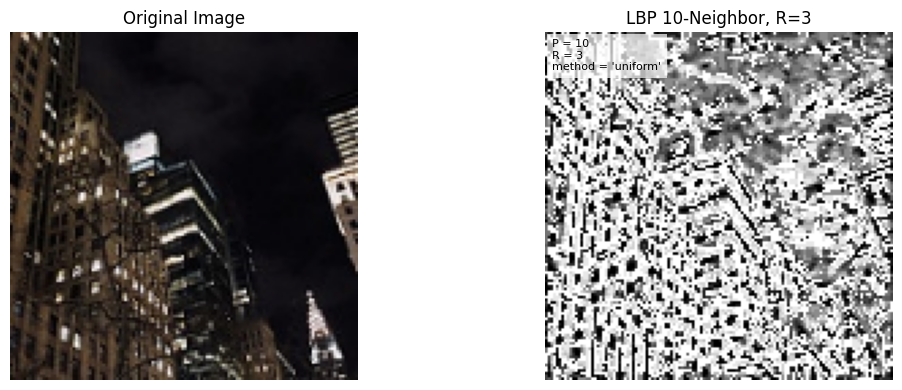

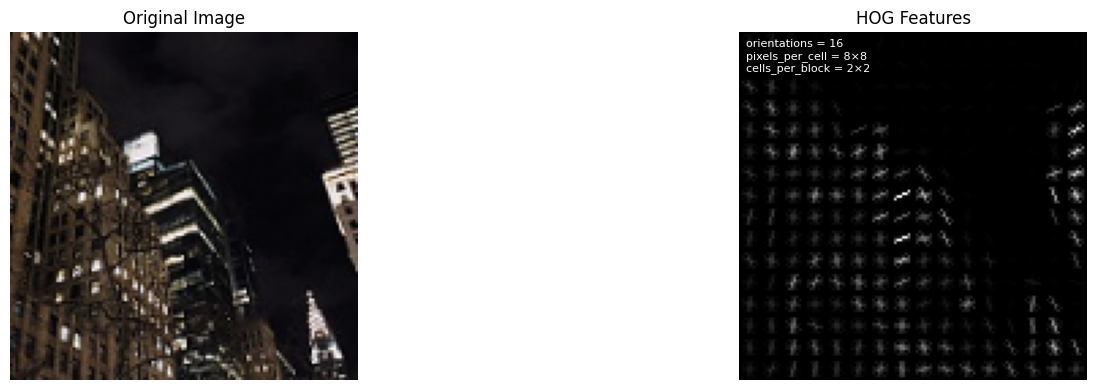

In [50]:
for i in range(1):
    show_lbp_and_hog(X_train[i])



In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog, local_binary_pattern


def show_lbp_and_hog_per_class_separate(
    X,
    y,
    class_names,
    lbp_P=10,
    lbp_R=3,
    orientations=16,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
):
    """
    Create two figures:
      1) One row per class, [Original | LBP]
      2) One row per class, [Original | HOG]

    X: images, shape (N, H, W, 3)
    y: labels, shape (N,), assumed to be integer class indices
    class_names: list of class names, index = class id
    """

    y = np.asarray(y)

    # Pick one example index per class that actually appears in y
    class_examples = []
    for class_id, class_name in enumerate(class_names):
        idxs = np.where(y == class_id)[0]
        if len(idxs) == 0:
            continue  # class not present
        class_examples.append((class_id, class_name, idxs[0]))

    n_classes = len(class_examples)
    if n_classes == 0:
        print("No classes from class_names found in y.")
        return

    # =========================
    # FIGURE 1: Original + LBP
    # =========================
    fig_lbp, axes_lbp = plt.subplots(
        n_classes, 2, figsize=(8, 3 * n_classes), squeeze=False
    )

    for row, (class_id, class_name, idx) in enumerate(class_examples):
        img = X[idx]
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # LBP
        lbp = local_binary_pattern(gray, P=lbp_P, R=lbp_R, method="uniform")

        ax_orig = axes_lbp[row, 0]
        ax_lbp = axes_lbp[row, 1]

        # Original
        ax_orig.imshow(img)
        ax_orig.set_title(f" Original {class_name} Image")
        ax_orig.axis("off")

        # LBP
        ax_lbp.imshow(lbp, cmap="gray")
        ax_lbp.set_title(f"LBP")
        ax_lbp.axis("off")

        lbp_text = f"P = {lbp_P}\nR = {lbp_R}\nmethod = 'uniform'"
        ax_lbp.text(
            0.02,
            0.98,
            lbp_text,
            transform=ax_lbp.transAxes,
            va="top",
            ha="left",
            fontsize=7,
            bbox=dict(facecolor="white", alpha=0.7, edgecolor="none"),
        )

    fig_lbp.subplots_adjust(
        left=0.03, right=0.97, top=0.95, bottom=0.05, wspace=0.05, hspace=0.15
    )

    # =========================
    # FIGURE 2: Original + HOG
    # =========================
    fig_hog, axes_hog = plt.subplots(
        n_classes, 2, figsize=(8, 3 * n_classes), squeeze=False
    )

    for row, (class_id, class_name, idx) in enumerate(class_examples):
        img = X[idx]
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        # HOG
        fd, hog_image = hog(
            gray,
            orientations=orientations,
            pixels_per_cell=pixels_per_cell,
            cells_per_block=cells_per_block,
            visualize=True,
            channel_axis=None,
        )

        ax_orig = axes_hog[row, 0]
        ax_hog = axes_hog[row, 1]

        # Original
        ax_orig.imshow(img)
        ax_orig.set_title(f" Original {class_name} Image")
        ax_orig.axis("off")

        # HOG
        ax_hog.imshow(hog_image, cmap="gray")
        ax_hog.set_title(f"HOG")
        ax_hog.axis("off")

        hog_text = (
            f"orient = {orientations}\n"
            f"pix_cell = {pixels_per_cell[0]}×{pixels_per_cell[1]}\n"
            f"cells_blk = {cells_per_block[0]}×{cells_per_block[1]}"
        )
        ax_hog.text(
            0.02,
            0.98,
            hog_text,
            transform=ax_hog.transAxes,
            va="top",
            ha="left",
            fontsize=7,
            bbox=dict(facecolor="black", alpha=0.7, edgecolor="none", pad=3),
            color="white",
        )

    fig_hog.subplots_adjust(
        left=0.03, right=0.97, top=0.95, bottom=0.05, wspace=0.05, hspace=0.15
    )

    plt.show()


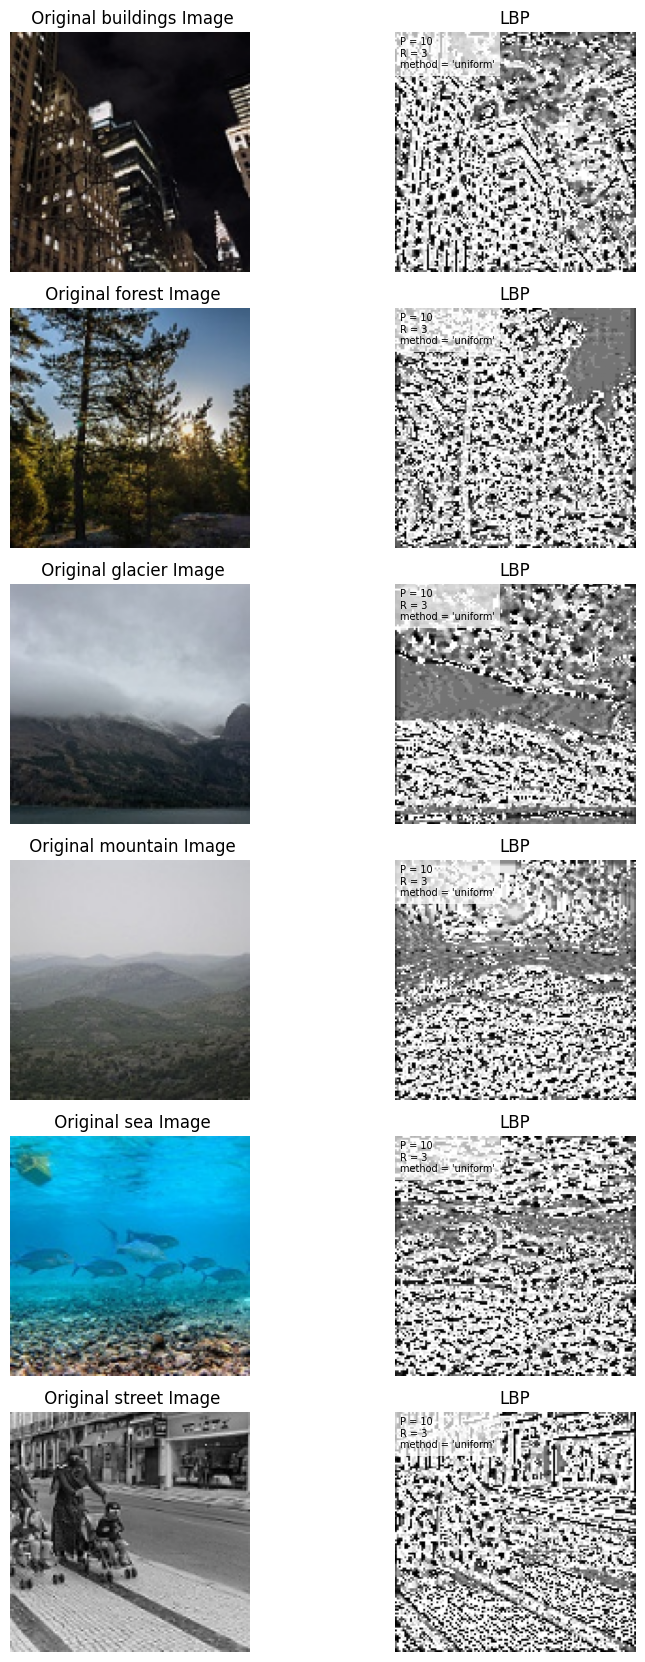

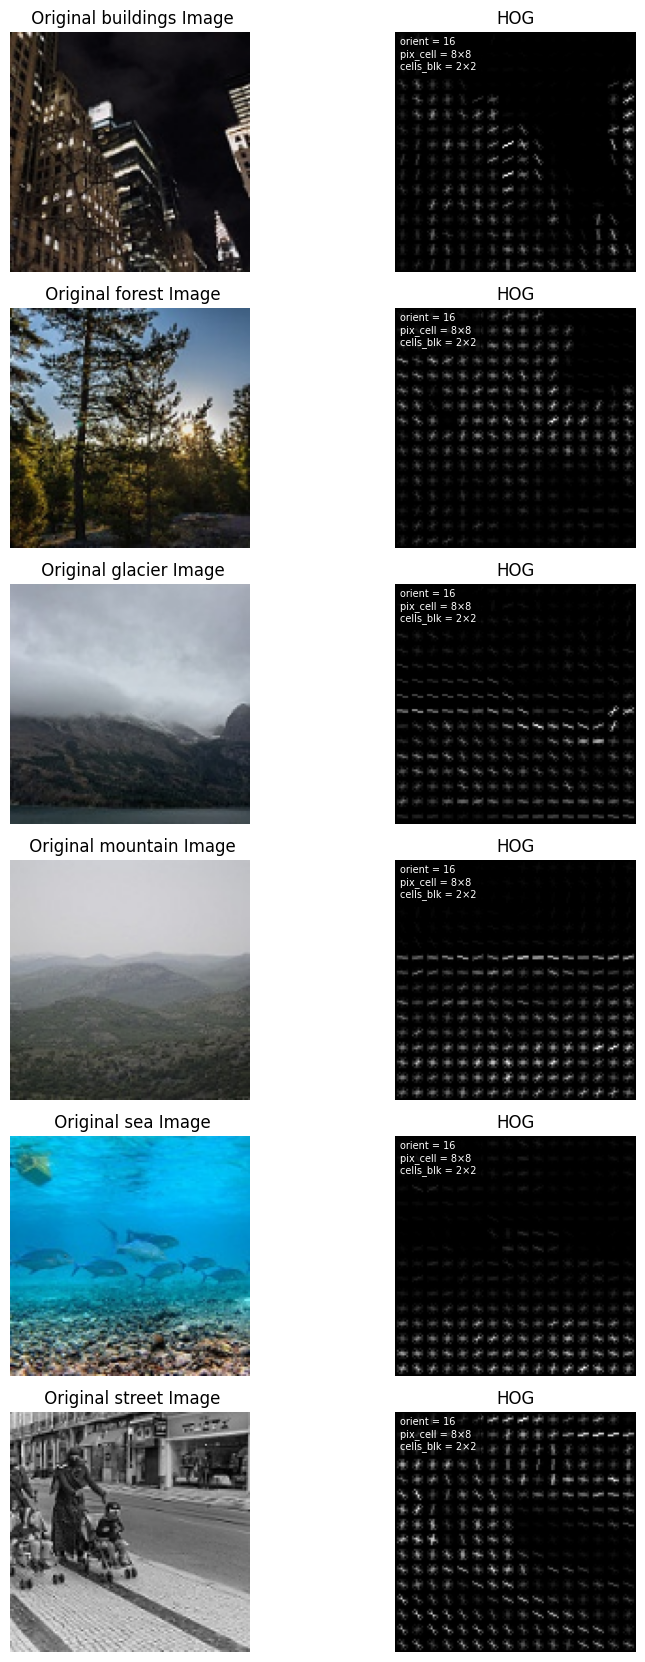

In [58]:
CLASS_NAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

show_lbp_and_hog_per_class_separate(
    X_train,
    y_train,
    CLASS_NAMES,
    lbp_P=10,
    lbp_R=3,
    orientations=16,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
)


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Bruker ca 6 min

In [29]:


clf = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=300, min_samples_split=5)


clf.fit(X_train_feats, y_train)
print("Training accuracy: ", accuracy_score(y_train, clf.predict(X_train_feats)))
print("Test accuracy: ", accuracy_score(y_test, clf.predict(X_test_feats)))






NameError: name 'X_train_feats' is not defined

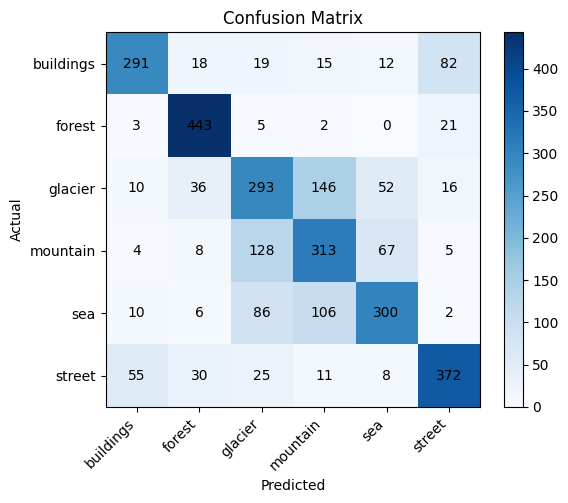

0.6706666666666666


In [ ]:
y_pred = clf.predict(X_test_feats)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(6, 5))
im = ax.imshow(cm, cmap="Blues")
plt.colorbar(im, ax=ax)

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, cm[i, j], ha="center", va="center", color="black")

ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_xticks(range(len(CLASS_NAMES)))
ax.set_yticks(range(len(CLASS_NAMES)))
ax.set_xticklabels(CLASS_NAMES, rotation=45, ha="right")
ax.set_yticklabels(CLASS_NAMES)
ax.set_title("Confusion Matrix")
plt.tight_layout()
plt.show()
print(accuracy_score(y_test, y_pred))

In [ ]:
print(accuracy_score(y_test, y_pred))

0.6706666666666666


XGBoost

In [ ]:
# ...existing code...
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    objective="multi:softmax",
    num_class=len(CLASS_NAMES),
    max_depth=8,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    random_state=42,
)
xgb_clf.fit(X_train_feats, y_train_feats)

xgb_pred = xgb_clf.predict(X_test_feats)
print(classification_report(y_test_feats, xgb_pred, target_names=CLASS_NAMES))
print(confusion_matrix(y_test_feats, xgb_pred))
print("XGB accuracy:", accuracy_score(y_test_feats, xgb_pred))

KeyboardInterrupt: 

generere short data

In [ ]:
import cv2
import numpy as np
from skimage.feature import hog, local_binary_pattern
from tqdm import tqdm


def extract_features(batch):
    feats = []
    for img in tqdm(batch, desc="Extracting features"):
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

        fd, _ = hog(
            gray,
            orientations=16,
            pixels_per_cell=(8, 8),
            cells_per_block=(2, 2),
            visualize=True,
            channel_axis=None,
        )

        # edges = cv2.Canny(gray, 128, 128).flatten().astype(np.float32) / 255.0

        lbp = local_binary_pattern(gray, P=10, R=3, method="uniform")
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, lbp.max() + 2), density=True)

        # feats.append(np.concatenate([fd, edges, lbp_hist]))
        feats.append(np.concatenate([fd, lbp_hist]))

    return np.asarray(feats, dtype=np.float32)

X_train_short_feats = extract_features(X_train_short)
X_test_short_feats = extract_features(X_test_short)
y_train_short_feats = y_train_short.copy()
y_test_short_feats = y_test_short.copy()

Extracting features:   0%|          | 0/2807 [00:00<?, ?it/s]

Extracting features: 100%|██████████| 600/600 [00:47<00:00, 12.67it/s]


In [ ]:
clf_short = RandomForestClassifier(random_state=42, max_depth=None, n_estimators=300, min_samples_split=5)


clf_short.fit(X_train_short_feats, y_train_short)
print("Training accuracy: ", accuracy_score(y_train_short, clf_short.predict(X_train_short_feats)))
print("Test accuracy: ", accuracy_score(y_test_short, clf_short.predict(X_test_short_feats)))

Training accuracy:  1.0
Test accuracy:  0.625


XGBoost på short_data

In [ ]:
# ...existing code...
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(
    objective="multi:softmax",
    num_class=len(CLASS_NAMES),
    max_depth=8,
    n_estimators=400,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_lambda=1.0,
    tree_method="hist",
    random_state=42,
)
xgb_clf.fit(X_train_short_feats, y_train_short)

xgb_pred = xgb_clf.predict(X_test_short_feats)
print(classification_report(y_test_short, xgb_pred, target_names=CLASS_NAMES))
print(confusion_matrix(y_test_short, xgb_pred))
print("XGB accuracy:", accuracy_score(y_test_short, xgb_pred))

              precision    recall  f1-score   support

   buildings       0.81      0.68      0.74        88
      forest       0.81      0.93      0.86        95
     glacier       0.55      0.57      0.56       110
    mountain       0.54      0.57      0.55       105
         sea       0.68      0.63      0.65       102
      street       0.76      0.74      0.75       100

    accuracy                           0.68       600
   macro avg       0.69      0.69      0.69       600
weighted avg       0.68      0.68      0.68       600

[[60  0  6  4  2 16]
 [ 0 88  4  0  0  3]
 [ 3  9 63 23 10  2]
 [ 2  2 26 60 14  1]
 [ 1  1 11 24 64  1]
 [ 8  9  4  1  4 74]]
XGB accuracy: 0.6816666666666666


In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC



svm = LinearSVC(C=1, max_iter=10000)
svm.fit(X_train_short_feats, y_train_short)

y_pred = svm.predict(X_test_short_feats)
print("LinearSVC test accuracy:", accuracy_score(y_test_short, y_pred))

LinearSVC test accuracy: 0.6166666666666667


In [ ]:
from sklearn.model_selection import StratifiedKFold

STACKING

In [ ]:


# def Stacking(model,train,y,test,n_fold):
#  folds=StratifiedKFold(n_splits=n_fold)
#  test_pred=np.empty((test.shape[0],1),float)
#  train_pred=np.empty((0,1),float)
#  for train_indices,val_indices in folds.split(train,y.values):
#     x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
#     y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]
#     model.fit(X=x_train,y=y_train)
#     train_pred=np.append(train_pred,model.predict(x_val))
#     test_pred=np.append(test_pred,model.predict(test))
#  return test_pred.reshape(-1,1),train_pred

Model 1 for stacking basert på random forest short

In [ ]:
# X_train_short_df = pd.DataFrame(X_train_short_feats)
# X_test_short_df = pd.DataFrame(X_test_short_feats)
# y_train_short_s = pd.Series(y_train_short)
# y_test_short_s = pd.Series(y_test_short)

In [ ]:


# test_pred1 ,train_pred1= Stacking(model=clf_short,n_fold=5, train=X_train_short_df,test=X_test_short_df,y=y_train_short_s)

In [ ]:
# train_pred1=pd.DataFrame(train_pred1)
# test_pred1=pd.DataFrame(test_pred1)


In [ ]:
# test_pred1.head

<bound method NDFrame.head of                   0
0      0.000000e+00
1     6.952446e-310
2     1.169947e-320
3               NaN
4     6.952446e-310
...             ...
1795   5.000000e+00
1796   0.000000e+00
1797   5.000000e+00
1798   5.000000e+00
1799   5.000000e+00

[1800 rows x 1 columns]>

In [ ]:
# train_pred1.head

<bound method NDFrame.head of         0
0     4.0
1     0.0
2     0.0
3     0.0
4     0.0
...   ...
1399  1.0
1400  5.0
1401  1.0
1402  5.0
1403  5.0

[1404 rows x 1 columns]>

Model 2 for stacking basert på svm short

In [ ]:
# test_pred2 ,train_pred2= Stacking(model=svm,n_fold=5,train=X_train_short_df,test=X_test_short_feats,y=y_train_short_s)


In [ ]:
# train_pred2=pd.DataFrame(train_pred2)
# test_pred2=pd.DataFrame(test_pred2)

In [ ]:
# test_pred2.head

<bound method NDFrame.head of                   0
0     2.470328e-323
1      0.000000e+00
2     2.470328e-323
3     1.976263e-323
4      0.000000e+00
...             ...
1795   5.000000e+00
1796   0.000000e+00
1797   5.000000e+00
1798   5.000000e+00
1799   5.000000e+00

[1800 rows x 1 columns]>

In [ ]:
# train_pred2.head

<bound method NDFrame.head of         0
0     4.0
1     5.0
2     5.0
3     0.0
4     0.0
...   ...
1399  1.0
1400  5.0
1401  5.0
1402  5.0
1403  5.0

[1404 rows x 1 columns]>

In [ ]:
# y_train_short_s.head

<bound method NDFrame.head of 0       0
1       0
2       0
3       0
4       0
       ..
1399    5
1400    5
1401    5
1402    5
1403    5
Length: 1404, dtype: int64>

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
# df = pd.concat([train_pred1, train_pred2], axis=1)
# df_test = pd.concat([test_pred1, test_pred2], axis=1)

In [ ]:
# df_test.head

<bound method NDFrame.head of                   0              0
0      0.000000e+00  2.470328e-323
1     6.952446e-310   0.000000e+00
2     1.169947e-320  2.470328e-323
3               NaN  1.976263e-323
4     6.952446e-310   0.000000e+00
...             ...            ...
1795   5.000000e+00   5.000000e+00
1796   0.000000e+00   0.000000e+00
1797   5.000000e+00   5.000000e+00
1798   5.000000e+00   5.000000e+00
1799   5.000000e+00   5.000000e+00

[1800 rows x 2 columns]>

In [ ]:
# print(df.head)
# print("----")
# y_test_short_s.head

<bound method NDFrame.head of         0    0
0     4.0  4.0
1     0.0  5.0
2     0.0  5.0
3     0.0  0.0
4     0.0  0.0
...   ...  ...
1399  1.0  1.0
1400  5.0  5.0
1401  1.0  5.0
1402  5.0  5.0
1403  5.0  5.0

[1404 rows x 2 columns]>
----


<bound method NDFrame.head of 0      0
1      0
2      0
3      0
4      0
      ..
295    5
296    5
297    5
298    5
299    5
Length: 300, dtype: int64>

In [ ]:
# model = LogisticRegression(random_state=42, max_iter=1000)
# model.fit(df,y_train_short_s)
# model.score(df_test, y_test_short_s)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


Bedre stacking :)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
rf_base = RandomForestClassifier(
    random_state=42,
    max_depth=None,
    n_estimators=300,
    min_samples_split=5,
)

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svm_base = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("svm", LinearSVC(C=1, max_iter=10000)),
    ]
)

In [ ]:

meta_model = LogisticRegression(random_state=42, max_iter=2000)

stacking_clf = StackingClassifier(
    estimators=[("rf", rf_base), ("svm", svm_base)],
    final_estimator=meta_model,
    stack_method="auto",
    passthrough=False,
    cv=5,
    n_jobs=-1,
)

stacking_clf.fit(X_train_short_feats, y_train_short)
stack_pred = stacking_clf.predict(X_test_short_feats)

print("Stacking train accuracy:", stacking_clf.score(X_train_short_feats, y_train_short))
print("Stacking test accuracy :", accuracy_score(y_test_short, stack_pred))
print(classification_report(y_test_short, stack_pred, target_names=CLASS_NAMES))

Stacking train accuracy: 1.0
Stacking test accuracy : 0.6566666666666666
              precision    recall  f1-score   support

   buildings       0.80      0.69      0.74        88
      forest       0.84      0.89      0.87        95
     glacier       0.50      0.56      0.53       110
    mountain       0.52      0.56      0.54       105
         sea       0.66      0.53      0.59       102
      street       0.70      0.73      0.72       100

    accuracy                           0.66       600
   macro avg       0.67      0.66      0.66       600
weighted avg       0.66      0.66      0.66       600

